# Multi-dimensional Regression (Multiple Linear Regression)

Math purely by matrix (Linear Regression / Udemy, Module 15)  
Ref: [matrix_cookbook](./matrix_cookbook.pdf)
```
Input  X [NxD]  : N=num samples, D=num features 
Output t [Nx1]
Coeff  w [Dx1]
y = Xw   (NxD.Dx1:=Nx1)

Cust Function J 
J = (t-y)T . (t-y) 
  = tTt - tTy - yTt + yTy 
  = tTt - tTXw - (Xw)Tt + (Xw)T(Xw)
  
@J/@w = -2XT + 2XTXw = 0 
  XTXw = XTt 
  w = [inv(XT.X)].XT.t
```

Simplest way to remember is as follows. 
> `y = X.w & (t as training for y)  ==> XT.t = XT.X.w` 

In [91]:
#lr_2d.py
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 


In [92]:
# load the data 
X = []
Y = []
for line in open('data_2d.csv'):
    x1,x2,y = line.split(',')
    X.append([1, float(x1), float(x2)])
    Y.append(float(y))
    
# change X Y into numpy arrays 
X = np.array(X)
Y = np.array(Y)

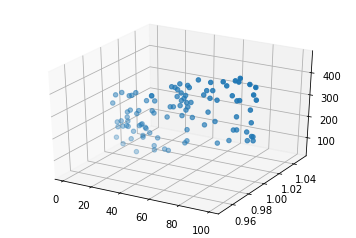

In [93]:
# let's plot the data to see what the data looks like 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( X[:,1],X[:,0],Y )
plt.show()
             

In [94]:
# calcualte weights
w = np.linalg.solve( np.dot(X.T, X), np.dot(X.T, Y) )

# prediction 
Yhat = np.dot(X,w)

# compute r-square 
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print('r-square = ', r2)

r-square =  0.9980040612475778


## Polynomial   
Quadratic function is expected in this example, i.e., `y = ax**2 + bx * c` 

In [95]:
# lr_poly.py 
import numpy as np 
import matplotlib.pyplot as plt 

In [96]:
# load the data 
X = []
Y = []
for line in open('data_poly.csv'):
    x,y = line.split(',')
    x = float(x)
    X.append([1, x, x*x])   # add x**2 
    Y.append(float(y))
    
X = np.array(X) 
Y = np.array(Y)

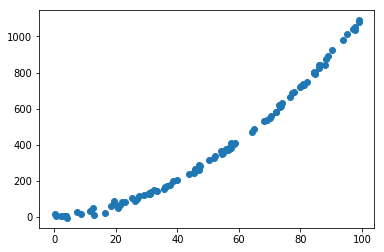

In [97]:
plt.scatter(X[:,1], Y)
plt.show()

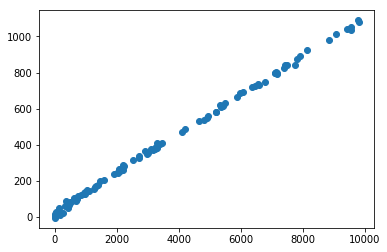

In [98]:
plt.scatter(X[:,2],Y)
plt.show()

r-square =  0.9991412296366858


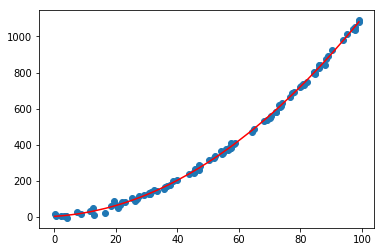

In [99]:
# calculate weghts 
w = np.linalg.solve( np.dot(X.T, X), np.dot(X.T, Y) )

# R-square 
Yhat = np.dot(X, w)
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print('r-square = ', r2)

plt.scatter(X[:,1],Y)
plt.plot(sorted(X[:,1]),sorted(Yhat),'r-')
plt.show()

## Blood Pressure

In [100]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_excel('mlr02.xls')
matX = df.as_matrix()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


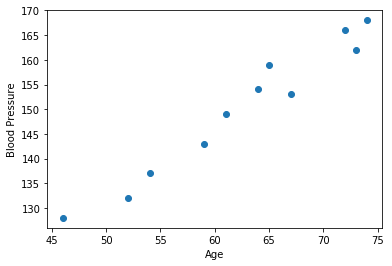

In [101]:
plt.scatter(matX[:,1], matX[:,0])
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

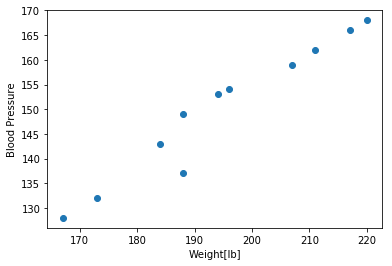

In [102]:
plt.scatter(matX[:,2], matX[:,0])
plt.xlabel('Weight[lb]')
plt.ylabel('Blood Pressure')
plt.show()

In [103]:
df['ones'] = 1  # for bias(intersection) calculation
Y = df['X1']

# Not which dimension has contribution to fitting
X = df[['X2', 'X3', 'ones']]  # Y = F(X2,X3)? 
X2only = df[['X2', 'ones']]   # Y = F(X2) ? 
X3only = df[['X3', 'ones']]   # Y = F(X3)? 

In [104]:
def get_r2(X,Y): 
    w = np.linalg.solve( X.T.dot(X), X.T.dot(Y))
    Yhat = X.dot(w)
    d1 = Y - Yhat 
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

In [105]:
print('r2 for X2 only : ', get_r2(X2only, Y))
print('r2 for X3 only : ', get_r2(X3only, Y))
print('r2 for X2 and X3 : ', get_r2(X, Y))

r2 for X2 only :  0.9578407208147355
r2 for X3 only :  0.9419952085293065
r2 for X2 and X3 :  0.9768471041502091
